In [1]:
from pca_functions import *

In [2]:
df_90 = pd.read_csv(r'D:\vr-pipeline\data\results\28052025_segment_data_t123_90s_1s_ketone.csv')
#df_45= pd.read_csv(r'D:\vr-pipeline\data\results\22052025_segment_data_t123_45s_45s_ketone.csv')
df_30 = pd.read_csv(r'D:\vr-pipeline\data\results\28052025_segment_data_t123_30s_30s_ketone.csv')


df_all = pd.concat([df_90, df_30], ignore_index=True)

In [3]:
df_90_empty_room=df_90[df_90['trial'] == 7]
#display(df_90)
df_90_pca = df_90_empty_room.drop(columns=['participant_id', 'edge_dist','drink', 'session','trial', 'version', 'segment', 'stops_count','unsafe_area_coverage', 'safe_area_coverage', 'safe_time_spent', 'unsafe_time_spent','outside_time_spent'])

#display(df_90_pca.head())

df_90_pca_x_axis= df_90_empty_room[['drink','session']]
df_90_pca_x_axis.loc[df_90_pca_x_axis['drink'] == 'placebo', 'drink'] = -0.5
df_90_pca_x_axis.loc[df_90_pca_x_axis['drink'] == 'ketone', 'drink'] = 0.5
scaler=StandardScaler()
df_90_pca_scaled=scaler.fit_transform(df_90_pca)
find_num_components_explaining_90variance(df_90_pca_scaled)

No. of components explaining 80 % of the variance in data: 3
No. of components explaining 85 % of the variance in data: 3
No. of components explaining 90 % of the variance in data: 4
No. of components explaining 95 % of the variance in data: 5
No. of components explaining 99 % of the variance in data: 6


In [4]:
df_90_pca_empty_room_df = pd.DataFrame(df_90_pca_scaled, columns=df_90_pca.columns)
reduced_3_data_90=reduce_data(df_90_pca_empty_room_df, 3)

Proportion of variance explained by each of the 3 components is: [0.43159037 0.19394361 0.15818546]
Total explained variance by 3 components is: 78.37194406443963


In [5]:
reduced_3_data_90_df = pd.DataFrame(reduced_3_data_90, columns=[f'PC{i+1}' for i in range(reduced_3_data_90.shape[1])])

In [6]:
combined_90_empty_room = pd.concat([
    df_90_empty_room[['participant_id', 'session', 'drink']].reset_index(drop=True),
    reduced_3_data_90_df[['PC1', 'PC2', 'PC3']].reset_index(drop=True)
], axis=1)

In [7]:
#combined_90_empty_room.to_csv('../data/pca/combined_90_empty_room_pca.csv', index=False)

In [8]:
# combined_90_empty_room['scene'] = 'Empty Room'
# combined_90_elevated_platform['scene'] = 'Elevated Platform'
# combined_90_dark_maze['scene'] = 'Dark Maze'

# df_combined = pd.concat([
#     combined_90_empty_room,
#     combined_90_elevated_platform,
#     combined_90_dark_maze
# ], ignore_index=True)  

In [9]:
component_weight_90_empty_room = components_weight(df_90_pca_empty_room_df, 3)

In [10]:
component_weight_90_empty_room

,center_dist,speed,acceleration,stops_duration,max_distance,area_covered,rmssd,hr
PC1,-0.126084,0.500750,0.359040,-0.385242,0.234081,0.471374,-0.271887,0.324223
PC2,0.630433,0.091669,0.157145,0.082623,0.561967,0.136754,0.422719,-0.222328
PC3,0.401168,-0.120841,0.288746,0.456512,0.017146,-0.238521,-0.431320,0.538016


In [11]:
# Rename the columns with more descriptive names
component_weight_90_empty_room = component_weight_90_empty_room.rename(
    columns={
        'center_dist': 'Distance from Center',
        'speed': 'Movement Speed',
        'acceleration': 'Movement Acceleration',
        'stops_duration': 'Duration of Stops',
        'max_distance': 'Maximum Distance',
        'area_covered': 'Area Coverage',
        'rmssd': 'RMSSD',
        'hr': 'HR'
    }
)

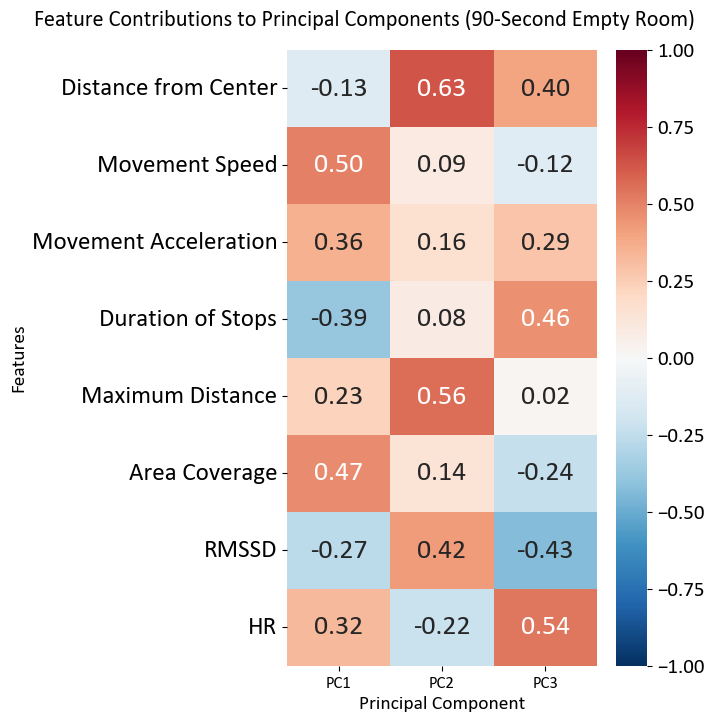

In [13]:
fig, ax = display_pc_weights_1(component_weight_90_empty_room, is_horizontal=False)

# Add title now!
fig.suptitle("Feature Contributions to Principal Components (90-Second Empty Room)", fontsize=16, x=0.28, y=0.93)

plt.show()